<a href="https://colab.research.google.com/github/adalbertii/phyton-binder/blob/main/wmi_keras_classification_iris_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Educational Friday**: 21.04.2023


---


Construction of neural networks - classification IRIS model

Using the Keras library

DataSet from: # https://www.kaggle.com/datasets/arshid/iris-flower-dataset
---




In [1]:
import numpy as np
import pandas as pd

In [3]:
iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X=iris.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X.shape

(150, 4)

In [9]:
y=iris['species']
y.head

<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object>

In [10]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [18]:
encoder = LabelBinarizer()

y = encoder.fit_transform(y)
y[0:5]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=101)


In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [23]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1


In [24]:
scaler = MinMaxScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [27]:
scaled_X_train[0:5]

array([[0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.33333333, 0.20833333, 0.50847458, 0.5       ],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.69444444, 0.41666667, 0.76271186, 0.83333333]])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
model.fit(x=scaled_X_train, y=y_train, epochs=300, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 0s 49ms/step - loss: 0.1497 - accuracy: 0.9583 - val_loss: 0.1772 - val_accuracy: 0.9333
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 0.1494 - accuracy: 0.9583 - val_loss: 0.1770 - val_accuracy: 0.9333
Epoch 3/300
4/4 [==============================] - 0s 19ms/step - loss: 0.1492 - accuracy: 0.9583 - val_loss: 0.1766 - val_accuracy: 0.9333
Epoch 4/300
4/4 [==============================] - 0s 27ms/step - loss: 0.1489 - accuracy: 0.9583 - val_loss: 0.1763 - val_accuracy: 0.9333


In [35]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.149720,0.958333,0.177195,0.933333
1,0.149447,0.958333,0.176978,0.933333
2,0.149152,0.958333,0.176630,0.933333
3,0.148853,0.958333,0.176331,0.933333


<AxesSubplot:>

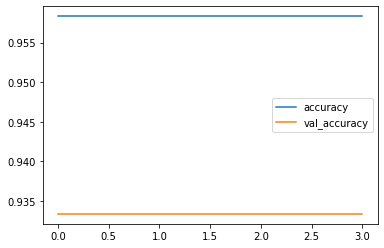

In [38]:
metrics[['accuracy', 'val_accuracy']].plot()

In [39]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.17633110284805298, 0.9333333373069763]

In [41]:
epochs = len(metrics)

scaled_X = scaler.fit_transform(X)

model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(scaled_X, y, epochs=epochs)


model.save("final_iris_model.h5")

Epoch 1/4
5/5 [==============================] - 1s 4ms/step - loss: 1.2934 - accuracy: 0.3333
Epoch 2/4
5/5 [==============================] - 0s 4ms/step - loss: 1.2829 - accuracy: 0.3333
Epoch 3/4
5/5 [==============================] - 0s 4ms/step - loss: 1.2717 - accuracy: 0.3333
Epoch 4/4
5/5 [==============================] - 0s 4ms/step - loss: 1.2626 - accuracy: 0.3333


In [ ]:
model.predict_classes

In [42]:
import joblib
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']



---


**Testing and preparing deployment package**



---



In [56]:
from tensorflow.keras.models import load_model

flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')
# kielich i płatki

iris.head(1)
flower_example={"sepal_length": 5.1,
                "sepal_width": 3.1,
                "petal_length": 1.4,
                "petal_width": 0.2}


In [52]:
encoder.classes_

array([0, 1, 2])

In [57]:
flower_example

{'sepal_length': 5.1,
 'sepal_width': 3.1,
 'petal_length': 1.4,
 'petal_width': 0.2}

Prediction function definition

In [79]:
def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]

    flower = [[s_len, s_wid, p_len, p_wid ]]

    classes = np.array(('setos', 'versicolor', 'virginica'))


    flower =  scaler.transform(flower)
    predict_x = model.predict(flower)
    classes_ind = np.argmax(predict_x,axis=1) 


    return classes[classes_ind][0]



In [80]:
wynik = return_prediction(flower_model, flower_scaler, flower_example)
wynik

1/1 [==============================] - 0s 39ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'virginica'

In [67]:
flower = [[5.1, 3.1, 1.4, 0.2 ]]
predict_x=model.predict(flower) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 76ms/step


In [69]:
classes_x[0]

1